In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from classifier import *
import features as fe 
import utils as ut
from sklearn.model_selection import train_test_split
import plotly.express as px

In [26]:
def Create_data(Dataset_Size):
    rect = fe.get_rectanges(19, 19)
    no_rect = fe.get_no_rectangles(19, 19)
    X_train_face_img, X_train_nonface_img, X_test_img, y_train_face, y_train_nonface, y_test = ut.get_test_train_data()
    X_train_sub_nonface_img, y_train_sub_nonface = ut.random_subset(X_train_nonface_img, y_train_nonface, len(X_train_face_img))
    assert(len(X_train_face_img) == len(X_train_sub_nonface_img))
    assert(len(y_train_face) == len(y_train_sub_nonface))
    assert(len(X_train_face_img) == len(y_train_face))
    assert(len(X_train_sub_nonface_img) == len(y_train_sub_nonface))

    X_train_img = np.concatenate((X_train_face_img, X_train_sub_nonface_img))
    y_train = np.concatenate((y_train_face, y_train_sub_nonface))

    X_data, y_data = ut.random_subset(X_train_img, y_train, Dataset_Size)
    X_data_fe = fe.par_feature_extraction_images(X_data, rect, no_rect)
    return X_data_fe, y_data
    

def Split_Data(X_data, y_data):
    return train_test_split(X_data, y_data, test_size=0.2)

In [27]:
X, y = Create_data(1000)
X_train, X_test, y_train, y_test = Split_Data(X, y)

number_of cpus =  16


## Feature Analysis
We look the following plots
- Time taken to convert image into integral immage vs size of the image.
- No of feature vectors vs size of the image
- Time taken to compute feature vectors vs size of the image. (sequential + parallel)
- Time to compute $i^{th}$ fixed vector for a fixed size of image.
- Time to compute $i^{th}$ feature vs size of the image.

### Time taken to convert image into integral image vs size of the image.

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import features as fe



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


19 19
(0, 0)
(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 5)
(6, 6)
(7, 7)
(8, 8)
(9, 9)
(10, 10)
(11, 11)
(12, 12)
(13, 13)
(14, 14)
(15, 15)
(16, 16)
(17, 17)
(18, 18)


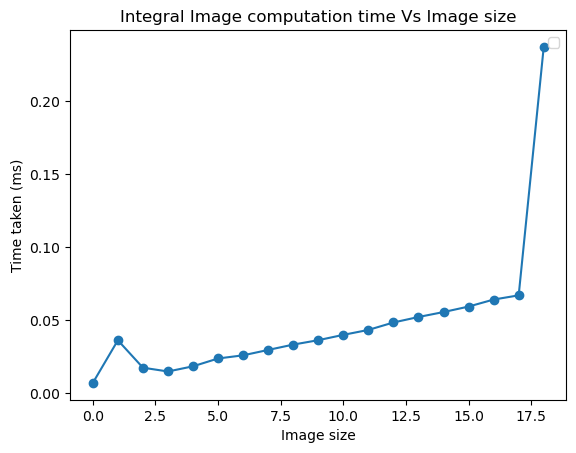

In [29]:
image = Image.open("Data/faces/face.train/train/face/face00001.pgm")
image = np.array(image)
W,H = image.shape
print(W,H)

time = []
img_size = []

for i in range(W):
    img = image[:i,:i]
    print(img.shape)
    s = timer()
    fe.caliculate_intergral_image(img)
    e = timer()
    time.append(1000*(e-s))
    img_size.append(i)

plt.plot(img_size,time,'o-')
plt.xlabel("Image size")
plt.ylabel("Time taken (ms)")
plt.title("Integral Image computation time Vs Image size")
plt.legend()
# plt.plot([0,1],[0,1])
plt.show()


### No of feature vectors vs size of the image

19 19


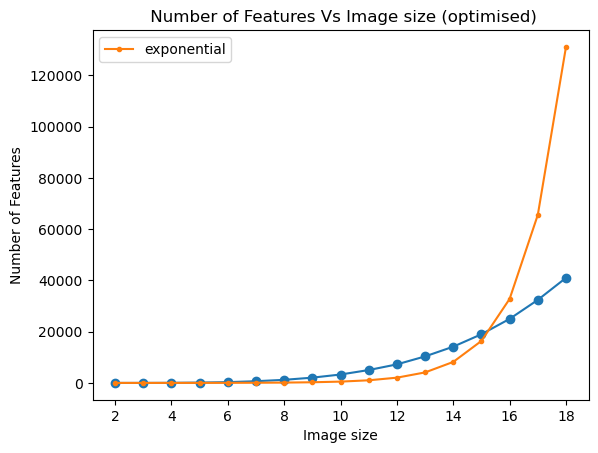

In [82]:
image = Image.open("Data/faces/face.train/train/face/face00001.pgm")
image = np.array(image)
W,H = image.shape
print(W,H)

f = []
img_size = []

for i in range(2,W,1):
    img = image[:i,:i]
    # print(img.shape)
    rect = fe.get_rectanges(i,i)
    no_rect = fe.get_no_rectangles(i, i)
    # nf = fe.par_feature_extraction_images(np.array([img]),rect,no_rect)
    nf = fe.feature_extraction_images(np.array([img]),rect,no_rect)
    img_size.append(i)
    f.append(nf.shape[1])
    # print(np.shape(nf))

# print(f,img_size)

exp = []
t = 1
for i in range(2,W,1):
    exp.append(2**(i-1))
    
plt.plot(img_size,f,'o-',)
plt.plot(img_size,exp,'.-',label="exponential")
plt.xlabel("Image size")
plt.ylabel("Number of Features")
# plt.title(" Number of Features Vs Image size (optimised)")
plt.title("Number of Features Vs Image size")
plt.legend()
# plt.plot([0,1],[0,1])
plt.show()


### Time taken to compute feature vectors vs size of the image.

19 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


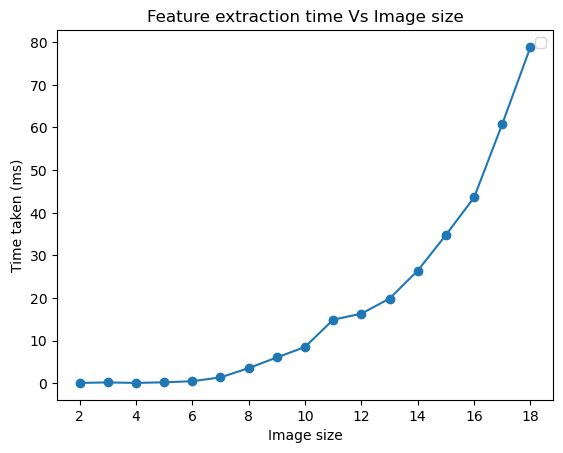

In [86]:
image = Image.open("Data/faces/face.train/train/face/face00001.pgm")
image = np.array(image)
W,H = image.shape
print(W,H)

t = []

img_size = []

for i in range(2,W,1):
    img = image[:i,:i]
    # print(img.shape)
    rect = fe.get_rectanges(i,i)
    no_rect = fe.get_no_rectangles(i, i)
    s = timer()
    nf = fe.feature_extraction_images(np.array([img]),rect,no_rect)
    # nf = fe.par_feature_extraction_images(np.array([img]),rect,no_rect)
    e = timer()
    img_size.append(i)
    t.append(1000*(e-s))
    # f.append(nf.shape[1])
    # print(np.shape(nf))

# print(f,img_size)

# exp = []

# for i in range(2,W,1):
#     exp.append((i**3)/40-(i**2)/5)

plt.plot(img_size,t,'o-',)
# plt.plot(img_size,exp,'.-',label="3rd degree polynomial")
plt.xlabel("Image size")
plt.ylabel("Time taken (ms)")
# plt.title("Feature extraction time Vs Image size (optimised)")
plt.title("Feature extraction time Vs Image size")
plt.legend()
# plt.plot([0,1],[0,1])
plt.show()


### Time to compute $i^{th}$ fixed vector for a fixed size of image.

### Time to compute $i^{th}$ feature vs size of the image.

## Adaboost Analysis
We investigate the following plots
- Accuracy vs number of features used in the adaboost classifier.
- Positve Detection rate vs number of features used in the adaboost classifier.
- False Positive rate vs number of features used in the adaboost classifier.
- False Negative rate vs number of features used in the adaboost classifier
- Time taken to classify subwindows vs number of features used in adaboost classifier.

In [28]:
def details_vs_num_features(X_train, y_train, X_test, y_test):
    num_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    accuracy = []
    detection_rate = []
    false_positive_rate = []
    false_negative_rate = []
    for i in num_features:
        clf = AdaBoostClassifier()
        clf.fit(X_train, y_train, i)
        accuracy.append(clf.score(X_test, y_test))
        detection_rate.append(clf.detection_rate(X_test, y_test))
        false_positive_rate.append(clf.false_positive_rate(X_test, y_test))
        false_negative_rate.append(clf.false_negative_rate(X_test, y_test))
    return num_features, accuracy, detection_rate, false_positive_rate, false_negative_rate

num_features, accuracy, detection_rate, false_positive_rate,false_negative_rate = details_vs_num_features(X_train, y_train, X_test, y_test)


### Accuracy vs number of features used in the adaboost classifier.

In [29]:
fig = px.line(x=num_features, y=accuracy, title='Accuracy vs Number of Features')
# change the names of the x-axis and y-axis
fig.update_xaxes(title_text='Number of Features')
fig.update_yaxes(title_text='Accuracy')
# adjust the size of the figure
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
)
fig.show()


### Positve Detection rate vs number of features used in the adaboost classifier.

In [30]:
fig = px.line(x=num_features, y=detection_rate, title='Detection Rate vs Number of Features')
# change the names of the x-axis and y-axis
fig.update_xaxes(title_text='Number of Features')
fig.update_yaxes(title_text='Detection Rate')
# adjust the size of the figure
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
)
fig.show()

### False Positive rate vs number of features used in the adaboost classifier.

In [31]:
fig = px.line(x=num_features, y=false_positive_rate, title='False Positive Rate vs Number of Features')
# change the names of the x-axis and y-axis
fig.update_xaxes(title_text='Number of Features')
fig.update_yaxes(title_text='False Positive Rate')
# adjust the size of the figure
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
)
fig.show()


### False Negative rate vs number of features used in the adaboost classifier

In [32]:
fig = px.line(x=num_features, y=false_negative_rate, title='False Negative Rate vs Number of Features')
# change the names of the x-axis and y-axis
fig.update_xaxes(title_text='Number of Features')
fig.update_yaxes(title_text='False Negative Rate')
# adjust the size of the figure
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
)
fig.show()


### Time taken to classify subwindows vs number of features used in adaboost classifier.

## Cascade Analysis
We investigate the following plots
- number of training samples for each layer.
- composition of training samples for each layer.
- overall best accuraciy results.
- Time taken to classify vs no of subwindows to be classified

In [39]:
def Cascade_Classifier_predict(X_test, y_test, Strong_Classifiers):
    y_preds = []
    for i in range((len(Strong_Classifiers))):
        y_pred = Strong_Classifiers[i].predict(X_test)
        y_preds.append(y_pred)

    ans = np.zeros(len(y_test)) 
    for i in range(len(y_test)):
        is_one = True
        for j in range(len(Strong_Classifiers)):
            if(y_preds[j][i] == 0):
                is_one = False
                break
        if(is_one == True):
            ans[i] = 1
        else:
            ans[i] = 0
    return ans


def Cascade_Classifier(X_test,y_test, Strong_Classifiers):
    y_pred = Cascade_Classifier_predict(X_test, y_test, Strong_Classifiers)
    false_positive_rate = np.sum((y_pred == 1) & (y_test == 0))/np.sum(y_test == 0)
    detection_rate = np.sum((y_pred == 1)& (y_test == 1))/np.sum(y_test == 1)
    return false_positive_rate, detection_rate



def Create_validation_sets(X_all, y_all):
    X_train, X_valid, y_train, y_valid = Split_Data(X_all, y_all)
    return X_train, X_valid, y_train, y_valid



def Train_Cascade(X_train_all, y_train_all):    
    F = [0.6]
    D = [0.9]
    f = 0.999
    d = 0.99
    F_target = 0.01
    Threshold_retention = 0.99
    
    F_new = F[-1]
    Strong_Classifiers = []
    no_outermost_loops = 0
    X_train, X_valid, y_train, y_valid = Create_validation_sets(X_train_all, y_train_all)
    No_of_samples_per_layer = []
    No_of_positive_samples_per_layer = []
    No_of_negative_samples_per_layer = []
    while F_new > F_target and no_outermost_loops < 5:
        no_outermost_loops += 1
        a = AdaBoostClassifier()
        F_new = F[-1]
        no_of_features = 0       
        No_of_samples_per_layer.append(len(X_train))
        while F_new > f*F[-1] and no_of_features < 50:          #### Hard coded
            no_of_features += 1       
            a.fit(X_train, y_train, no_of_features)
            Strong_Classifiers.append(a)
            F_new, D_new = Cascade_Classifier(X_valid, y_valid, Strong_Classifiers)

            no_innermost_iter = 0
            while(no_innermost_iter < 50):            #### Hard coded
                no_innermost_iter += 1
                a = Strong_Classifiers[-1]
                Strong_Classifiers[-1].threshold = Strong_Classifiers[-1].threshold*Threshold_retention
                F_new, D_new = Cascade_Classifier(X_valid, y_valid, Strong_Classifiers)
               # print("L1:", len(Strong_Classifiers), " L2:", no_of_features, " L3:", no_innermost_iter, " F_new: ", F_new, " F_tar:  ", f*F[-1], " D_new:", D_new, "D_expected:", d*D[-1], " Threshold:", a.threshold)
                if D_new > d*D[-1]:       #### Hard coded          
                    break     
                if a.threshold < 1e-10:   #### Hard coded
                    break
                
            Strong_Classifiers.pop()

        F.append(F_new)
        D.append(D_new)
        Strong_Classifiers.append(a)  
        y_pred = a.predict(X_train)
        # number of 1s in y_pred
        no_of_ones = np.sum(y_pred == 1)
        No_of_positive_samples_per_layer.append(no_of_ones)
        # number of 0s in y_pred
        no_of_zeros = np.sum(y_pred == 0)
        No_of_negative_samples_per_layer.append(no_of_zeros)
        X_train = X_train[y_pred == 1] 
        y_train = y_train[y_pred == 1]
        if(len(y_train) < 10):
            break
    return Strong_Classifiers, No_of_samples_per_layer,No_of_positive_samples_per_layer,No_of_negative_samples_per_layer



Strong_Classifiers,No_of_samples_per_layer,No_of_positive_samples_per_layer,No_of_negative_samples_per_layer = np.array(Train_Cascade(X_train, y_train))
print("the length of the strong classifiers is", len(Strong_Classifiers))

the length of the strong classifiers is 5


### number of training samples for each layer.

In [40]:
# print the number of samples per layer vs the number of layers
fig = px.line(x=range(len(No_of_samples_per_layer)), y=No_of_samples_per_layer, title='Number of Samples vs Number of Layers')
# change the names of the x-axis and y-axis
fig.update_xaxes(title_text='Number of Layers')
fig.update_yaxes(title_text='Number of Samples')
# adjust the size of the figure
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
)
fig.show()

### composition of training samples for each layer.

In [41]:
# tabulate the number of positive and negative samples per layer
table = pd.DataFrame({'Number of Positive Samples': No_of_positive_samples_per_layer, 'Number of Negative Samples': No_of_negative_samples_per_layer})
table



,Number of Positive Samples,Number of Negative Samples
0,358,282
1,296,62
2,285,11
3,282,3
4,281,1


### Overall best accuracy results

### Time taken to classify vs no of subwindows to be classified